In [ ]:
pip install pandas odfpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=462303892be0a4b7122bf3b96b0eb2642d3023a97d1a79d64d4ac01593e9eb19
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


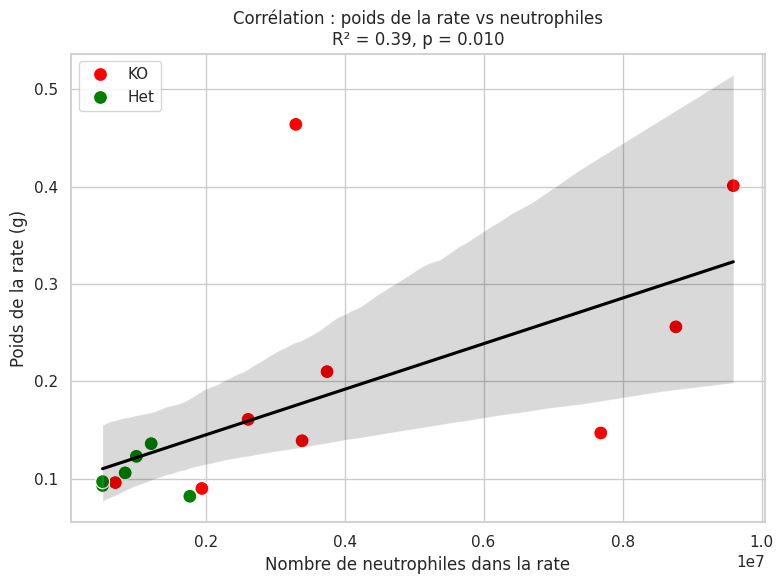

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Charger les données
data = pd.read_excel("comparaison_rate_nombre_neutrophile.ods", engine="odf")

# Calcul de la régression linéaire (renvoie aussi r-value)
slope, intercept, r_value, p_value, std_err = linregress(
    data['neutrophils_in_spleen'], data['spleen_weight_g']
)

# Coefficient de détermination
r_squared = r_value**2

# Palette personnalisée : hétérozygotes = vert, KO = rouge
# Tu dois t'assurer que les valeurs de 'genotype' dans ta colonne sont bien "Het" et "KO"
custom_palette = {
    'Het': 'green',
    'KO': 'red'
}

# Graphique
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Scatterplot avec couleurs personnalisées
sns.scatterplot(
    x='neutrophils_in_spleen',
    y='spleen_weight_g',
    hue='genotype',
    data=data,
    palette=custom_palette,
    s=100
)

# Ligne de régression
sns.regplot(
    x='neutrophils_in_spleen',
    y='spleen_weight_g',
    data=data,
    scatter=False,
    color='black',
    line_kws={'label': 'Régression linéaire'}
)

# Titre avec R² et p-value
plt.title(f"Corrélation : poids de la rate vs neutrophiles\nR² = {r_squared:.2f}, p = {p_value:.3f}")
plt.xlabel("Nombre de neutrophiles dans la rate")
plt.ylabel("Poids de la rate (g)")
plt.legend()
plt.tight_layout()

# Sauvegarde
plt.savefig("poids_rate_vs_neutrophiles.png", dpi=300)
plt.show()

